In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

df = pd.read_csv('raw_data/raw_data_FINAL_ALL.csv')
# features and target selection
X_scaled = pd.DataFrame()
#X_scaled = df.drop(columns=['Ratio ticker sp500'])
#X_scaled = X_scaled.set_index('Ticker')


#selecting just the 40 first columns (data for the year 23)

df_reduced = df[df.columns[:42].to_list()]

df_target =  pd.read_csv('raw_data/tickers_target_ALL.csv')

df_other = pd.read_csv('raw_data/nasdaq_tickers_raw.csv')

In [2]:
df_reduced.columns

Index(['Ticker', '2023 Ordinary Shares Number', '2023 Share Issued',
       '2023 Net Debt', '2023 Total Debt', '2023 Tangible Book Value',
       '2023 Invested Capital', '2023 Working Capital',
       '2023 Net Tangible Assets', '2023 Common Stock Equity',
       '2023 Total Capitalization',
       '2023 Total Equity Gross Minority Interest', '2023 Minority Interest',
       '2023 Stockholders Equity',
       '2023 Gains Losses Not Affecting Retained Earnings',
       '2023 Other Equity Adjustments', '2023 Retained Earnings',
       '2023 Additional Paid In Capital', '2023 Capital Stock',
       '2023 Common Stock', '2023 Preferred Stock',
       '2023 Total Liabilities Net Minority Interest',
       '2023 Total Non Current Liabilities Net Minority Interest',
       '2023 Other Non Current Liabilities', '2023 Employee Benefits',
       '2023 Non Current Pension And Other Postretirement Benefit Plans',
       '2023 Long Term Debt And Capital Lease Obligation',
       '2023 Long Term D

In [3]:
columns_relevant = ['Ticker','2023 Stockholders Equity','2023 Total Debt','2023 Current Liabilities','2023 Total Assets','2023 Working Capital']
df_reduced = df[columns_relevant]

In [4]:
#drop columns that have more than 30% of missing data:
def remove_shitty_columns(df):
    for column in df.columns:
        if df[column].isnull().sum()/len(df) > 0.3:
            df.drop(columns=[column], inplace=True)
    return df

#drop rows that have more than 30% of missing values
def remove_shitty_rows(df):
    threshold = 0.3 * df.shape[1]  # Calculate the threshold for missing values
    df = df.dropna(thresh=int(df.shape[1] - threshold))
    return df
#FINAL CLEANING FUNCTION
def clean_dataframe(df):
    df = remove_shitty_columns(df)
    df = remove_shitty_rows(df)
    df = df.reset_index(drop=True)
    return df

In [5]:
df_cleaned = clean_dataframe(df_reduced)

In [6]:
df_other.rename(columns={'Symbol': 'Ticker'}, inplace = True)

In [7]:
df_other

,Ticker,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1999.0,1593543,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,2016.0,5272723,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,2008.0,12048,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,2021.0,3672,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.1707,0.0108,6.754%,0.000000e+00,United States,2021.0,25825,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
7128,ZVRA,Zevra Therapeutics Inc. Common Stock,$4.595,0.0350,0.768%,1.923168e+08,United States,NaN,271570,Health Care,Biotechnology: Pharmaceutical Preparations
7129,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,2022.0,30162,Health Care,Biotechnology: Pharmaceutical Preparations
7130,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$30.46,-0.8300,-2.653%,5.260346e+09,United States,2012.0,820408,Industrials,Industrial Machinery/Components
7131,ZYME,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,NaN,555490,Health Care,Biotechnology: Pharmaceutical Preparations


In [8]:
df = df_target.merge(df_cleaned,how= 'inner', on='Ticker')


In [9]:
df

,Unnamed: 0,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital
0,0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09
1,1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09
2,2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08
3,3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06
4,4,AACIW,NaN,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06
...,...,...,...,...,...,...,...,...
5974,6328,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08
5975,6329,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07
5976,6331,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06
5977,6332,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08


In [10]:
df_other

,Ticker,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1999.0,1593543,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,2016.0,5272723,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,2008.0,12048,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,2021.0,3672,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.1707,0.0108,6.754%,0.000000e+00,United States,2021.0,25825,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
7128,ZVRA,Zevra Therapeutics Inc. Common Stock,$4.595,0.0350,0.768%,1.923168e+08,United States,NaN,271570,Health Care,Biotechnology: Pharmaceutical Preparations
7129,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,2022.0,30162,Health Care,Biotechnology: Pharmaceutical Preparations
7130,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$30.46,-0.8300,-2.653%,5.260346e+09,United States,2012.0,820408,Industrials,Industrial Machinery/Components
7131,ZYME,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,NaN,555490,Health Care,Biotechnology: Pharmaceutical Preparations


In [11]:
df = df.merge(df_other, how= 'inner', on='Ticker')

In [12]:
df

,Unnamed: 0,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1999.0,1593543,Industrials,Electrical Products
1,1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,2016.0,5272723,Industrials,Aluminum
2,2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,2008.0,12048,Real Estate,Other Consumer Services
3,3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,2021.0,3672,Finance,Blank Checks
4,4,AACIW,NaN,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,Armada Acquisition Corp. I Warrant,$0.1707,0.0108,6.754%,0.000000e+00,United States,2021.0,25825,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5974,6328,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,Zuora Inc. Class A Common Stock,$9.72,0.1500,1.567%,1.419120e+09,United States,2018.0,1561743,Technology,EDP Services
5975,6329,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,Zevia PBC Class A Common Stock,$0.89,-0.0181,-1.993%,6.434510e+07,United States,2021.0,113316,Consumer Staples,Beverages (Production/Distribution)
5976,6331,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,2022.0,30162,Health Care,Biotechnology: Pharmaceutical Preparations
5977,6332,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,NaN,555490,Health Care,Biotechnology: Pharmaceutical Preparations


In [13]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [14]:
df.columns

Index(['Ticker', 'Ratio ticker sp500', '2023 Stockholders Equity',
       '2023 Total Debt', '2023 Current Liabilities', '2023 Total Assets',
       '2023 Working Capital', 'Name', 'Last Sale', 'Net Change', '% Change',
       'Market Cap', 'Country', 'IPO Year', 'Volume', 'Sector', 'Industry'],
      dtype='object')

In [15]:
df_fin = df[[ 'Ticker', 'Ratio ticker sp500','2023 Stockholders Equity', '2023 Total Debt',
       '2023 Current Liabilities', '2023 Total Assets', '2023 Working Capital', 'Net Change', 'Market Cap', 'Volume']]

In [16]:
df_fin 

,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Net Change,Market Cap,Volume
0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,-2.7300,4.263368e+10,1593543
1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,0.7300,7.888057e+09,5272723
2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,0.0098,2.720011e+07,12048
3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,-0.0058,0.000000e+00,3672
4,AACIW,NaN,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,0.0108,0.000000e+00,25825
...,...,...,...,...,...,...,...,...,...,...
5974,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,0.1500,1.419120e+09,1561743
5975,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,-0.0181,6.434510e+07,113316
5976,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,0.0128,3.562000e+06,30162
5977,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,-0.2300,5.995775e+08,555490


In [17]:
df_fin = clean_dataframe(df)

In [18]:
df_final.dropna(inplace = True)

NameError: name 'df_final' is not defined

In [20]:
import yfinance as yf


yf.Ticker('AAPL').balance_sheet.index

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Common Stock Equity',
       'Total Capitalization', 'Total Equity Gross Minority Interest',
       'Stockholders Equity', 'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings', 'Capital Stock',
       'Common Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Tradeand Other Payables Non Current',
       'Long Term Debt And Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Other Current Liabilities',
       'Current Deferred Liabilities', 'Current Deferred Revenue',
       'Current Debt And Capital Lease Obligation', 'Current Debt',
       'Other Current Borrowings', 'Commercial Paper',
       'Payables And Accrue

In [21]:
yf.Ticker('AAPL').financials.index

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Net Non Operating Interest Income Expense',
       'Interest Expense Non Operating', 'Interest Income Non Operating',
       'Operating Inco

In [21]:
yf.Ticker('AAPL').income_stmt.index

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Net Non Operating Interest Income Expense',
       'Interest Expense Non Operating', 'Interest Income Non Operating',
       'Operating Inco

In [19]:
yf.Ticker('AAPL').cashflow.index

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Issuance Of Capital Stock', 'Capital Expenditure',
       'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
       'End Cash Position', 'Beginning Cash Position', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Cash Dividends Paid',
       'Common Stock Dividend Paid', 'Net Common Stock Issuance',
       'Common Stock Payments', 'Common Stock Issuance',
       'Net Issuance Payments Of Debt', 'Net Short Term Debt Issuance',
       'Net Long Term Debt Issuance', 'Long Term Debt Payments',
       'Long Term Debt Issuance', 'Investing Cash Flow',
       'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase And Sale',
       'Sale Of Investment', 'Purchase Of Investment',
       'Net Business Purchase And Sale', 'Purch

In [32]:
df['pipeline__2019 Ratio ticker sp500']

0      -0.294649
1      -0.507405
2       0.470169
3       0.247422
4       0.368546
          ...   
1557    0.273506
1558   -0.889590
1559    1.121664
1560    2.542868
1561   -1.598561
Name: pipeline__2019 Ratio ticker sp500, Length: 1562, dtype: float64

In [33]:
yf.Ticker('AAPL').get_income_stmt().loc['BasicEPS']

2023-09-30    6.16
2022-09-30    6.15
2021-09-30    5.67
2020-09-30    3.31
Name: BasicEPS, dtype: object

In [31]:
yf.Ticker('AAPL').get_income_stmt()

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0
TaxRateForCalcs,0.147,0.162,0.133,0.144
NormalizedEBITDA,129188000000.0,133138000000.0,123136000000.0,81020000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,96995000000.0,99803000000.0,94680000000.0,57411000000.0
ReconciledDepreciation,11519000000.0,11104000000.0,11284000000.0,11056000000.0
ReconciledCostOfRevenue,214137000000.0,223546000000.0,212981000000.0,169559000000.0
EBITDA,129188000000.0,133138000000.0,123136000000.0,81020000000.0
EBIT,117669000000.0,122034000000.0,111852000000.0,69964000000.0
NetInterestIncome,-183000000.0,-106000000.0,198000000.0,890000000.0
InterestExpense,3933000000.0,2931000000.0,2645000000.0,2873000000.0


In [20]:
pd_nasdaq = pd.read_csv('raw_data/nasdaq_tickers_raw.csv')

In [21]:
pd_nasdaq 

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1999.0,1593543,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,2016.0,5272723,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,2008.0,12048,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,2021.0,3672,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.1707,0.0108,6.754%,0.000000e+00,United States,2021.0,25825,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
7128,ZVRA,Zevra Therapeutics Inc. Common Stock,$4.595,0.0350,0.768%,1.923168e+08,United States,NaN,271570,Health Care,Biotechnology: Pharmaceutical Preparations
7129,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,2022.0,30162,Health Care,Biotechnology: Pharmaceutical Preparations
7130,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$30.46,-0.8300,-2.653%,5.260346e+09,United States,2012.0,820408,Industrials,Industrial Machinery/Components
7131,ZYME,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,NaN,555490,Health Care,Biotechnology: Pharmaceutical Preparations


In [22]:
df_fin

,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Name,Last Sale,Net Change,% Change,Market Cap,Country,Volume,Sector,Industry
0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1593543,Industrials,Electrical Products
1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,5272723,Industrials,Aluminum
2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,12048,Real Estate,Other Consumer Services
3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,3672,Finance,Blank Checks
4,AACIW,NaN,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,Armada Acquisition Corp. I Warrant,$0.1707,0.0108,6.754%,0.000000e+00,United States,25825,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,Zuora Inc. Class A Common Stock,$9.72,0.1500,1.567%,1.419120e+09,United States,1561743,Technology,EDP Services
5969,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,Zevia PBC Class A Common Stock,$0.89,-0.0181,-1.993%,6.434510e+07,United States,113316,Consumer Staples,Beverages (Production/Distribution)
5970,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,30162,Health Care,Biotechnology: Pharmaceutical Preparations
5971,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,555490,Health Care,Biotechnology: Pharmaceutical Preparations


## Train test split using 0.2 for the test

In [35]:
# Drop rows where any value is greater than the threshold
df_filtered = df_fin[df_fin['Ratio ticker sp500'] < 4]

<Axes: xlabel='Ratio ticker sp500', ylabel='Count'>

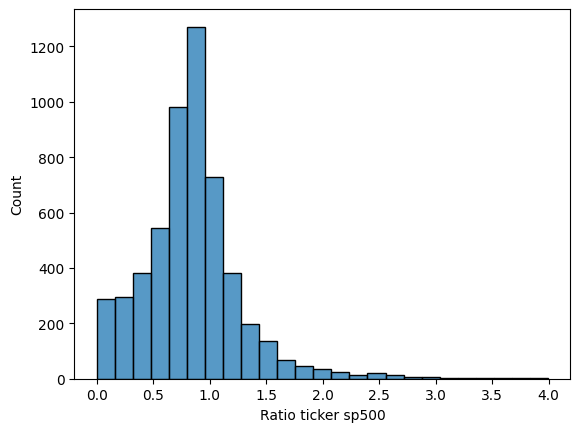

In [36]:
sns.histplot(df_filtered['Ratio ticker sp500'],bins=25)

In [42]:
df_filtered = df_filtered.dropna()

In [45]:
X = df_filtered.drop(columns = ['Ticker', 'Ratio ticker sp500'])
y = df_filtered['Ratio ticker sp500']

In [56]:
X = X[['2023 Stockholders Equity', '2023 Total Debt',
       '2023 Current Liabilities', '2023 Total Assets', '2023 Working Capital', 'Net Change', 'Market Cap', 'Volume']]

In [57]:
X

,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Net Change,Market Cap,Volume
0,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,-2.7300,4.263368e+10,1593543
1,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,0.7300,7.888057e+09,5272723
2,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,0.0098,2.720011e+07,12048
3,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,-0.0058,0.000000e+00,3672
6,1.051950e+08,1.267000e+06,2.639500e+07,1.324230e+08,9.819100e+07,-0.1200,4.321540e+07,353943
...,...,...,...,...,...,...,...,...
5968,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,0.1500,1.419120e+09,1561743
5969,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,-0.0181,6.434510e+07,113316
5970,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,0.0128,3.562000e+06,30162
5971,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,-0.2300,5.995775e+08,555490


In [66]:
y_encoded = y.apply(lambda x: 1 if x > 1 else 0)

## Linear regression

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', LinearRegression())
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
cv_scores

array([-0.01332828, -0.01446466,  0.007413  ,  0.02058251, -0.07755633])

In [64]:
#the score of the linearRegression is really bad

## Knn 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# KNN
# Create a pipeline with RobustScaler and KNN Classifier
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=2))  # You can choose a different number of neighbors
])

# Define the cross-validation strategy
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y_encoded, cv=cv, scoring='accuracy')

NameError: name 'Pipeline' is not defined

In [110]:
cv_scores

array([0.69867947, 0.703125  , 0.71995192, 0.71274038, 0.72235577])

In [108]:
X

,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Net Change,Market Cap,Volume
0,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,-2.7300,4.263368e+10,1593543
1,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,0.7300,7.888057e+09,5272723
2,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,0.0098,2.720011e+07,12048
3,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,-0.0058,0.000000e+00,3672
6,1.051950e+08,1.267000e+06,2.639500e+07,1.324230e+08,9.819100e+07,-0.1200,4.321540e+07,353943
...,...,...,...,...,...,...,...,...
5968,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,0.1500,1.419120e+09,1561743
5969,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,-0.0181,6.434510e+07,113316
5970,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,0.0128,3.562000e+06,30162
5971,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,-0.2300,5.995775e+08,555490


In [8]:
len(X_train.columns)

20

In [103]:
df_filtered

,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Name,Last Sale,Net Change,% Change,Market Cap,Country,Volume,Sector,Industry
0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1593543,Industrials,Electrical Products
1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,5272723,Industrials,Aluminum
2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,12048,Real Estate,Other Consumer Services
3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,3672,Finance,Blank Checks
6,AADI,0.197612,1.051950e+08,1.267000e+06,2.639500e+07,1.324230e+08,9.819100e+07,Aadi Bioscience Inc. Common Stock,$1.76,-0.1200,-6.383%,4.321540e+07,United States,353943,Health Care,Biotechnology: Pharmaceutical Preparations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,Zuora Inc. Class A Common Stock,$9.72,0.1500,1.567%,1.419120e+09,United States,1561743,Technology,EDP Services
5969,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,Zevia PBC Class A Common Stock,$0.89,-0.0181,-1.993%,6.434510e+07,United States,113316,Consumer Staples,Beverages (Production/Distribution)
5970,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,30162,Health Care,Biotechnology: Pharmaceutical Preparations
5971,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,555490,Health Care,Biotechnology: Pharmaceutical Preparations


In [ ]:
sns.pairplot(X_train)

In [ ]:
sns.histplot(y_train, bins=30)

In [ ]:
y 

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
y_train


In [44]:

feature_names = X.columns.to_list()

# Select the best 2 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

# Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_new, columns=selected_features)

/Users/guillaumegavillet/.pyenv/versions/3.10.6/envs/project_env/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [45]:
X_selected_df 

,pipeline__2023 Net PPE,pipeline__2023 Accumulated Depreciation,pipeline__2023 Gross PPE,pipeline__2023 Other Properties,pipeline__2023 Machinery Furniture Equipment,pipeline__2023 Current Assets,pipeline__2023 Receivables,pipeline__2023 Accounts Receivable,pipeline__2023 Cash Cash Equivalents And Short Term Investments,pipeline__2023 Cash And Cash Equivalents
0,116.490645,-91.952321,102.375756,-0.137027,-0.137658,18.518459,9.260858,12.168475,26.514222,1.984273
1,0.428972,-0.609874,0.468973,-0.081874,1.673182,0.001723,0.017559,0.098365,-0.027057,-0.125151
2,0.960711,-0.982697,0.917387,-0.007824,2.697467,0.328336,0.648570,0.647806,-0.185893,-0.303681
3,131.600684,-295.410361,193.144485,-0.137027,513.638792,198.158251,284.819789,179.874584,216.702488,118.367510
4,0.462412,-0.306574,0.364981,-0.137027,0.451183,-0.236801,-0.208136,-0.194984,-0.186904,4.318132
...,...,...,...,...,...,...,...,...,...,...
1557,4.030591,-4.179320,3.928660,-0.137027,6.980449,-0.236801,1.581906,-0.194984,-0.186904,8.423826
1558,-0.190090,0.199530,-0.204937,-0.137027,-0.137658,-0.236801,-0.208136,-0.194984,-0.186904,-0.304817
1559,0.016991,0.073852,-0.038201,0.541414,-0.129484,1.061648,0.097214,0.166272,2.654630,2.824469
1560,0.753612,-0.536217,0.620854,3.720426,0.717302,3.757348,2.514953,3.360493,7.213275,4.693979


<Axes: >

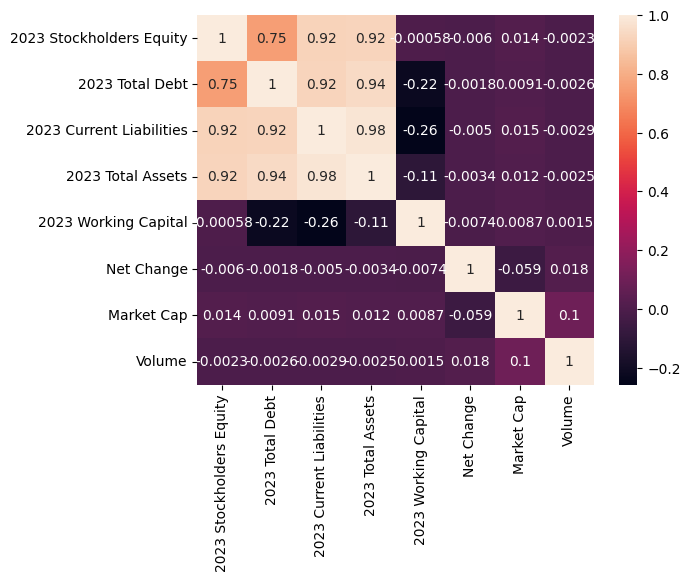

In [43]:
sns.heatmap(X.corr(), annot=True)

In [ ]:
sns.pairplot(X_selected_df)

In [38]:
X_selected_df

,pipeline__2023 Net PPE,pipeline__2023 Accumulated Depreciation,pipeline__2023 Gross PPE,pipeline__2023 Other Properties,pipeline__2023 Machinery Furniture Equipment,pipeline__2023 Current Assets,pipeline__2023 Receivables,pipeline__2023 Accounts Receivable,pipeline__2023 Cash Cash Equivalents And Short Term Investments,pipeline__2023 Cash And Cash Equivalents
0,30.313377,-23.224814,26.342710,2.157548,100.700007,7.932212,0.070887,0.169329,16.216776,13.949723
1,1.196847,-0.778489,0.966921,3.359286,1.192739,0.412313,-0.193871,-0.176359,0.034981,-0.101366
2,-0.157621,0.187194,-0.181775,-0.024811,-0.133414,0.001338,-0.120998,-0.194984,0.339419,-0.082094
3,2.614067,-1.915693,2.220128,9.193278,2.078520,0.006513,-0.093755,-0.074266,0.303761,0.246683
4,-0.120883,0.041199,-0.102150,-0.134920,0.094254,-0.184018,-0.143287,-0.110313,-0.140401,-0.252548
...,...,...,...,...,...,...,...,...,...,...
1244,-0.185493,0.193787,-0.200041,-0.117812,-0.130304,-0.231713,-0.202055,-0.187045,-0.181612,-0.298869
1245,-0.189362,0.199024,-0.204324,-0.137027,-0.136784,-0.223663,-0.207224,-0.194984,-0.157144,-0.271368
1246,1.156427,-1.085809,1.068633,-0.137027,2.423102,25.332674,22.811502,23.872875,9.766009,10.090027
1247,-0.189237,0.169958,-0.192496,-0.098652,-0.133722,-0.232173,-0.203644,-0.189119,-0.181496,-0.298738


## Cross validation 

### cross validation on the full data

In [ ]:
# features selection for the cross validation
X = X_train
y = y_train

In [ ]:
# cross validation on the data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Step 3: Create the linear regression model
model = Ridge()

# Step 4: Perform cross-validation
# We'll use 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
scores

### cross validation on the features selected

In [ ]:
# features selection for the cross validation
## features selected using only year 2023 and using SelectKBest with k = 10
X_reduced = X_selected_df.drop(columns = ['pipeline__2023 Accumulated Depreciation'])
X_reduced

In [ ]:
X = X_reduced
y = y_train

In [ ]:
# Step 3: Create the linear regression model
model = Ridge()

# Step 4: Perform cross-validation
# We'll use 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Convert negative MSE to positive for easier interpretation
scores

## classification unsupervised


In [ ]:
# features selection for the cross validation
X=pd.DataFrame()
X = X_train
y = y_train

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Apply K-Means clustering
kmeans = KMeans(n_clusters=9, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(X)



In [ ]:

# Add the cluster labels to the original DataFrame
X['Cluster'] = clusters

# Evaluate the clustering
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')



In [ ]:
# Plot the clusters (for visualization, use the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
sns.histplot(X['Cluster'])

In [10]:
y

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1557   NaN
1558   NaN
1559   NaN
1560   NaN
1561   NaN
Name: binary_target, Length: 1562, dtype: float64

## Neural network

In [17]:
# binary classification
# Define the threshold
threshold = 1.0  # Set your desired threshold value

# Create the binary target column
df['binary_target'] = (df['Ratio ticker sp500'] > threshold).astype(int)

# Prepare the target
y = df['binary_target']


In [23]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1557    1
1558    0
1559    0
1560    1
1561    0
Name: binary_target, Length: 1562, dtype: int64

In [28]:
X_train.shape[1]

20

In [29]:
X_train

,pipeline__2023 Ordinary Shares Number,pipeline__2023 Share Issued,pipeline__2023 Total Debt,pipeline__2023 Tangible Book Value,pipeline__2023 Invested Capital,pipeline__2023 Working Capital,pipeline__2023 Net Tangible Assets,pipeline__2023 Capital Lease Obligations,pipeline__2023 Common Stock Equity,pipeline__2023 Total Capitalization,pipeline__2023 Total Equity Gross Minority Interest,pipeline__2023 Stockholders Equity,pipeline__2023 Gains Losses Not Affecting Retained Earnings,pipeline__2023 Retained Earnings,pipeline__2023 Additional Paid In Capital,pipeline__2023 Capital Stock,pipeline__2023 Common Stock,pipeline__2023 Total Liabilities Net Minority Interest,pipeline__2023 Total Non Current Liabilities Net Minority Interest,pipeline__2023 Long Term Debt And Capital Lease Obligation
Ticker,,,,,,,,,,,,,,,,,,,,
RYAAY,14.284370,13.441371,5.485493,10.830914,5.053416,-5.104520,10.791570,3.556852,5.329314,4.572648,4.937666,5.310976,1.379172,5.893233,1.196920,0.990438,1.964170,4.178011,5.693983,4.674507
SCVL,-0.124329,0.013247,0.297922,0.711733,0.033648,0.850159,0.709148,6.017867,0.252254,0.044430,0.220331,0.247548,0.023269,0.909233,-0.237389,0.020768,0.058150,-0.025138,0.426407,0.297977
KALV,-0.033510,-0.070898,-0.162673,0.066198,-0.169077,0.343294,0.065958,-0.003037,-0.109463,-0.162690,-0.115756,-0.113197,-0.110572,-0.499145,0.231367,-0.035410,-0.052276,-0.205532,-0.093887,-0.147378
SHEN,0.175208,0.126077,0.310991,0.894550,0.271106,0.083307,0.891300,0.798597,0.378370,0.283005,0.337512,0.373326,0.096225,0.811178,-0.255633,-0.040490,-0.062261,0.014589,0.697634,0.390088
LWAY,-0.286035,-0.277614,-0.169970,-0.174306,-0.223495,-0.100093,-0.173673,-0.147541,-0.209272,-0.218998,-0.208494,-0.212738,0.023269,0.078715,-0.324343,0.932019,1.849339,-0.205923,-0.098301,-0.156262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRPO,-0.458068,-0.471567,-0.172457,-0.255468,-0.250410,-0.168829,-0.254540,-0.137063,-0.254922,-0.245920,-0.250909,-0.258266,0.023269,-0.152987,-0.205149,-0.038398,-0.058150,-0.213083,-0.105366,-0.157976
SNGX,-0.341942,-0.361976,-0.169187,-0.253629,-0.255408,-0.159635,-0.252707,-0.146793,-0.266736,-0.252171,-0.261887,-0.270049,0.024242,-0.333257,-0.077227,-0.038939,-0.059214,-0.211613,-0.104339,-0.157028
LX,3.778823,4.069739,7.404167,17.523789,8.183522,20.014715,17.460133,0.584862,9.365557,5.819568,8.687928,9.336382,47.831256,8.098812,3.216010,-0.004632,0.008223,5.266450,1.813445,1.411642


In [48]:
X_selected_df.columns 

Index(['pipeline__2023 Net PPE', 'pipeline__2023 Accumulated Depreciation',
       'pipeline__2023 Gross PPE', 'pipeline__2023 Other Properties',
       'pipeline__2023 Machinery Furniture Equipment',
       'pipeline__2023 Current Assets', 'pipeline__2023 Receivables',
       'pipeline__2023 Accounts Receivable',
       'pipeline__2023 Cash Cash Equivalents And Short Term Investments',
       'pipeline__2023 Cash And Cash Equivalents'],
      dtype='object')

In [50]:
X_col = X_selected_df[['pipeline__2023 Cash And Cash Equivalents','pipeline__2023 Gross PPE','pipeline__2023 Current Assets']]

In [51]:
X_col

,pipeline__2023 Cash And Cash Equivalents,pipeline__2023 Gross PPE,pipeline__2023 Current Assets
0,1.984273,102.375756,18.518459
1,-0.125151,0.468973,0.001723
2,-0.303681,0.917387,0.328336
3,118.367510,193.144485,198.158251
4,4.318132,0.364981,-0.236801
...,...,...,...
1557,8.423826,3.928660,-0.236801
1558,-0.304817,-0.204937,-0.236801
1559,2.824469,-0.038201,1.061648
1560,4.693979,0.620854,3.757348


In [42]:
y.shape

(1562,)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# try a neural network 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/100


/Users/guillaumegavillet/.pyenv/versions/3.10.6/envs/project_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.0000e+00 - loss: 2592481280.0000 - val_accuracy: 0.0000e+00 - val_loss: -1403006208.0000
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.0000e+00 - loss: 725740928.0000 - val_accuracy: 0.0000e+00 - val_loss: -2637628416.0000
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 560657728.0000 - val_accuracy: 0.0000e+00 - val_loss: -4135736832.0000
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.0000e+00 - loss: 419991840.0000 - val_accuracy: 0.0000e+00 - val_loss: -6696232448.0000
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.0000e+00 - loss: 271655936.0000 - val_accuracy: 0.0000e+00 - val_loss: -8857822208.0000
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.0000e+00 - loss: -1475560320.0000 - val_accuracy: 0.0000e+00 - val_loss: -14024510464.0000
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss